Word Embeddings 
-------
<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/embeddings.png" alt="embeddings" width="1000"/>

By The End Of This Session You Should Be Able To:
---

- Describe why word embeddings are a popular and powerful
- Explain how word embeddings is a neural network
- Understand the common training methodology

Pop Quiz
---

Do computers prefer numbers or words?



__Numbers__

What are Word Embeddings?
-----

<br>
<br>
Word Embedding are a collection of algorithms that map words (strings) to numbers (vectors - arrays of floats).
</details>

Why are Word Embeddings important?
-----

Turns text into a numerical form (meaningful word vectors) allows computers to better process the information.

Including creating a representation that other Deep Learning and Machine Learning algorithms can use in-turn.

How does word2vec work?
----

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/firth.png" width="400"/></center>

>“You shall know a word
>by the company it keeps”

> \- J. R. Firth 1957

Distributional Hypothesis
----

> Words that are used and occur in the same contexts tend to have similar meanings

__Example:__  
> ... government debt problems are turning into __banking__ crises...  

> ... Europe governments needs unified __banking__ regulation to replace the hodgepodge of debt regulations...

The words: _government_, _regulation_ and _debt_ probably represent some aspect of __banking__ since they frequently appear near by.

The words: _Pokeman_ and _tubular_ probably do __not__ represent some aspect of __banking__ since they do not frequently appear near by.

How does word2vec model the Distributional Hypothesis?
---

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/w2v_neural_net.png" width="1000"/></center>

word2Vec is a __very__ simple neural network

Once the training is complete, the output softmax layer is discarded and the remaining weights become the embedding layer

<center><img src="attachment:b97b7a58-3a8d-406c-a29a-2afba143df5c.png" width="1000"/></center>

Note the bow-tie shape - that is is an __autoencoder__. 

Autoencoders
-------

<center><img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width="1000"/></center>

Compress a sparse representation into a dense representation. 

Learns the mapping that best preserves the structure of the original space.

Story time...
----

<center><img src="http://worldartsme.com/images/king-and-queen-clipart-1.jpg" width="300"/></center>

A man and woman meet each other ...

The man and woman become king and queen ...

The king and queen get old and stop talking to each other. Instead, they read books and magazines ...

In [1]:
# Represent data
corpus = """The man and woman meet each other ...
         The man and woman become king and queen ...
         The king and queen get old and stop talking to each other. Instead, they read books and magazines ...
         """

In [2]:
import numpy as np

# Assign important words to vectors by hand
important_words = ['queen', 'book', 'king', 'magazine', 'woman', 'man']

vectors = np.array([[0.1,   0.3],  # queen
                    [-0.5, -0.1],  # book
                    [0.2,   0.2],  # king
                    [-0.3, -0.2],  # magazine
                    [-0.5,  0.4],  # car
                    [-0.45, 0.3]]) # bike

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

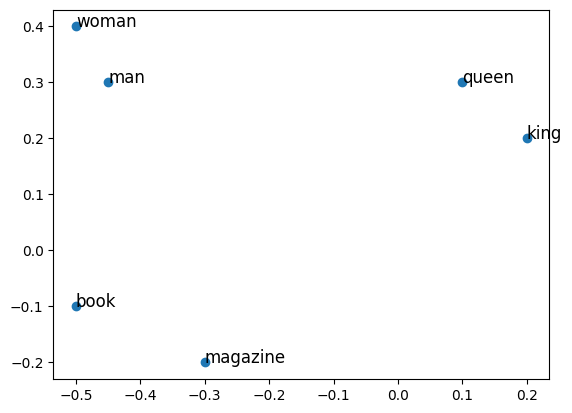

In [4]:
# Plot the most important words
plt.plot(vectors[:,0], vectors[:,1], 'o')
for word, x, y in zip(important_words, vectors[:,0], vectors[:,1]):
    plt.annotate(word, (x, y), size=12)

Check for understanding
---

How many dimensions are data represented in? 

**There are 2 dimensions** 

How many dimensions would we need to represent 1-hot encoded word vectors? 

__5 dimensions__

Typically you would use n-1 word vectors (a baseline word would be coded as all zeros). 

```python
# Encode each word using 1-hot encoding
{'queen':    [0, 0, 0, 0, 0],
 'book':     [0, 0, 0, 0, 1],
 'king':     [0, 0, 0, 1, 0],
 'magazine': [0, 0, 1, 0, 0],
 'woman':    [0, 1, 0, 0, 0],
 'man':      [1, 0, 0, 0, 0],
}
```

word2vec creates low-dimensional, dense vectors
------

In contrast to other NLP encodings which are larger and sparser.

In terms of Big O space complexity, how does the dimensionality of the representation increase in word2vec vs 1-hot encoding?
---------

 For example - if double the number of unique words in our dataset how many more dimensions would we need to represent the data? 

Word2vec is __constant O(1)__. Word2vec always represents the data in a fixed number of dimensions.

1-hot encoding is __linear O(n)__. We have to add 1 dimension for every unique word.

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/w2v_neural_net.png" width="1000"/></center>

The vectors are the weights in the neural network. Each hidden node is a dimension.

The dimensions are not directly interpretable.

In [5]:
# Training: From random to clustering
from IPython.display import VimeoVideo

VimeoVideo("112168934")

The weights start random. Then group and separate during each training pass.

The 2 training methods for word2vec training
----

1) “Skip-gram”: Predict target word, given a nearby word


2) “Continuous bag of words”: Predict target word, given a context

Sentence:  
"Selling these fine leather jackets"

Skip-gram training methodology: <br> Predict target word, given a nearby word
----

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip_gram2.png" width="900"/></center>


Skip-gram example
---

>“… selling these fine leather jackets”

```
bi-grams = {selling these, these fine, 
            fine leather, leather jackets}

skip-two-bi-grams = {selling these, selling fine, selling leather, 
                    these fine, these leather, these jackets, 
                    fine leather, fine jackets, 
                    leather jackets}
```

Defining skip-grams
---

<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip-gram-equation.png" style="width: 400px;"/>


Skip-Gram training methodology, deep dive
----

<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip_gram_detailed.png" style="width: 400px;"/>

The target word is now at the input layer, and the context words are on the output layer.

On the output layer, instead of outputing one multinomial distribution, we are outputing C multinomial distributions. Each output is computed using the same hidden to output matrix


Continuous bag of words (CBOW) training methodology: <br>Predict target word, given a context
-----

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/cbow2.png" width="900"/></center>

The context is represented as a bag of the words contained in a fixed size window around the target word.

Skip-gram vs. CBOW
-----

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/cbo_vs_skipgram.png" width="1000"/></center>

[Reference](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

[Detailed explanation](http://alexminnaar.com/word2vec-tutorial-part-ii-the-continuous-bag-of-words-model.html)

CBOW vs. Skip-gram
----

CBOW is several times faster to train than the skip-gram and has slightly better accuracy for  frequent words.  

Skip-gram works well with a small amount of the training data and well represents rare words.

__Skip-gram is the most common training methodology.__

Summary
------

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/book.png" width="700"/></center>

Summary
----

- Word2vec: Create a dense vector representation of words that models semantic meaning based on context
- Word2Vec is popular because it is straight forward to implement and creates dense embedding vectors.
- Word2Vec is a _relatively_ simple neural net with 1 input layer, 1 hidden layer, and 1 output layer.
- There are 2 common training methodology: 
    1. CBOW: given context, predict word
    2. skip-gram: given word, predict context
- Sets you up for machine learning and Deep Learning